In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


in this data our label target is Survived column.
classification type of Regression.

In [3]:
df.drop(['Name'],axis=1,inplace=True)

In [4]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

in this data set we can drop the cabin column as in this column there are too many missing or null values which wont affect the data if we drop it.

In [6]:
df.drop(['Cabin'],axis=1,inplace=True)

In [7]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


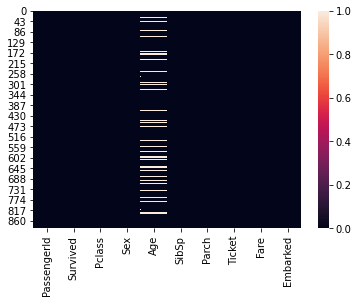

In [8]:
sns.heatmap(df.isnull())

now according to the heatmap we use the strategy of mean in age to replace the null values with the mean or average of ages in that column.

In [9]:
imp=SimpleImputer(strategy='mean')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C


In [10]:
df['Age'].mean()

29.699117647058763

null values are replaced by this value.

In [11]:
imp=SimpleImputer(strategy='most_frequent')
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C


In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

no missing values are present now in our dataset

In [13]:
df.drop(['Ticket'],axis=1,inplace=True)

In [14]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


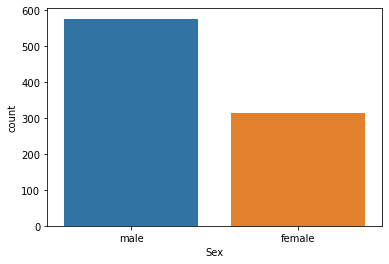

In [15]:
sns.countplot(x='Sex',data=df)

in indicates that male population is more than the females in our dataset.

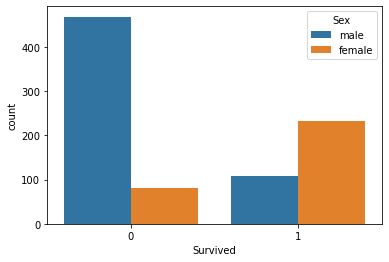

In [16]:
sns.countplot(x='Survived',hue='Sex',data=df)

this indicates that female survived more than the males in our dataset.

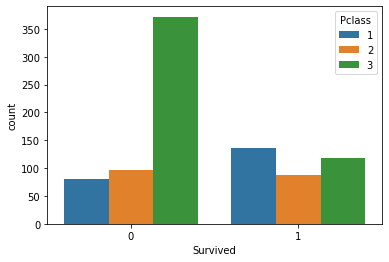

In [17]:
sns.countplot(x='Survived',hue='Pclass',data=df)

this indicates that for the 3rd class there is almost no survival as for the 1st class people survived the most.

In [18]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,S
1,2,1,1,0,38.000000,1,0,71.2833,C
2,3,1,3,0,26.000000,0,0,7.9250,S
3,4,1,1,0,35.000000,1,0,53.1000,S
4,5,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,S
887,888,1,1,0,19.000000,0,0,30.0000,S
888,889,0,3,0,29.699118,1,2,23.4500,S
889,890,1,1,1,26.000000,0,0,30.0000,C


we have specify into numeric that 1 is for males and 0 is for females.

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df.drop(['Embarked'],axis=1,inplace=True)

In [21]:
dfcorr=df.corr()

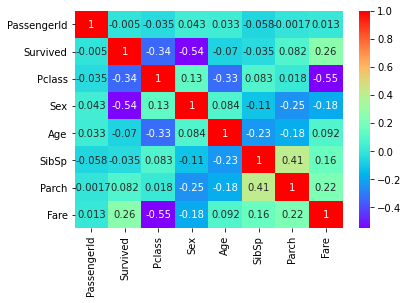

In [22]:
sns.heatmap(dfcorr,cmap='rainbow',annot=True)

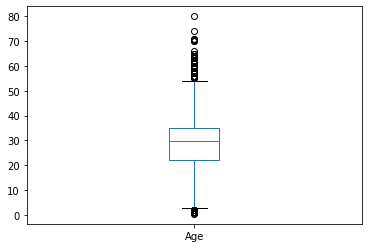

In [23]:
df['Age'].plot.box()

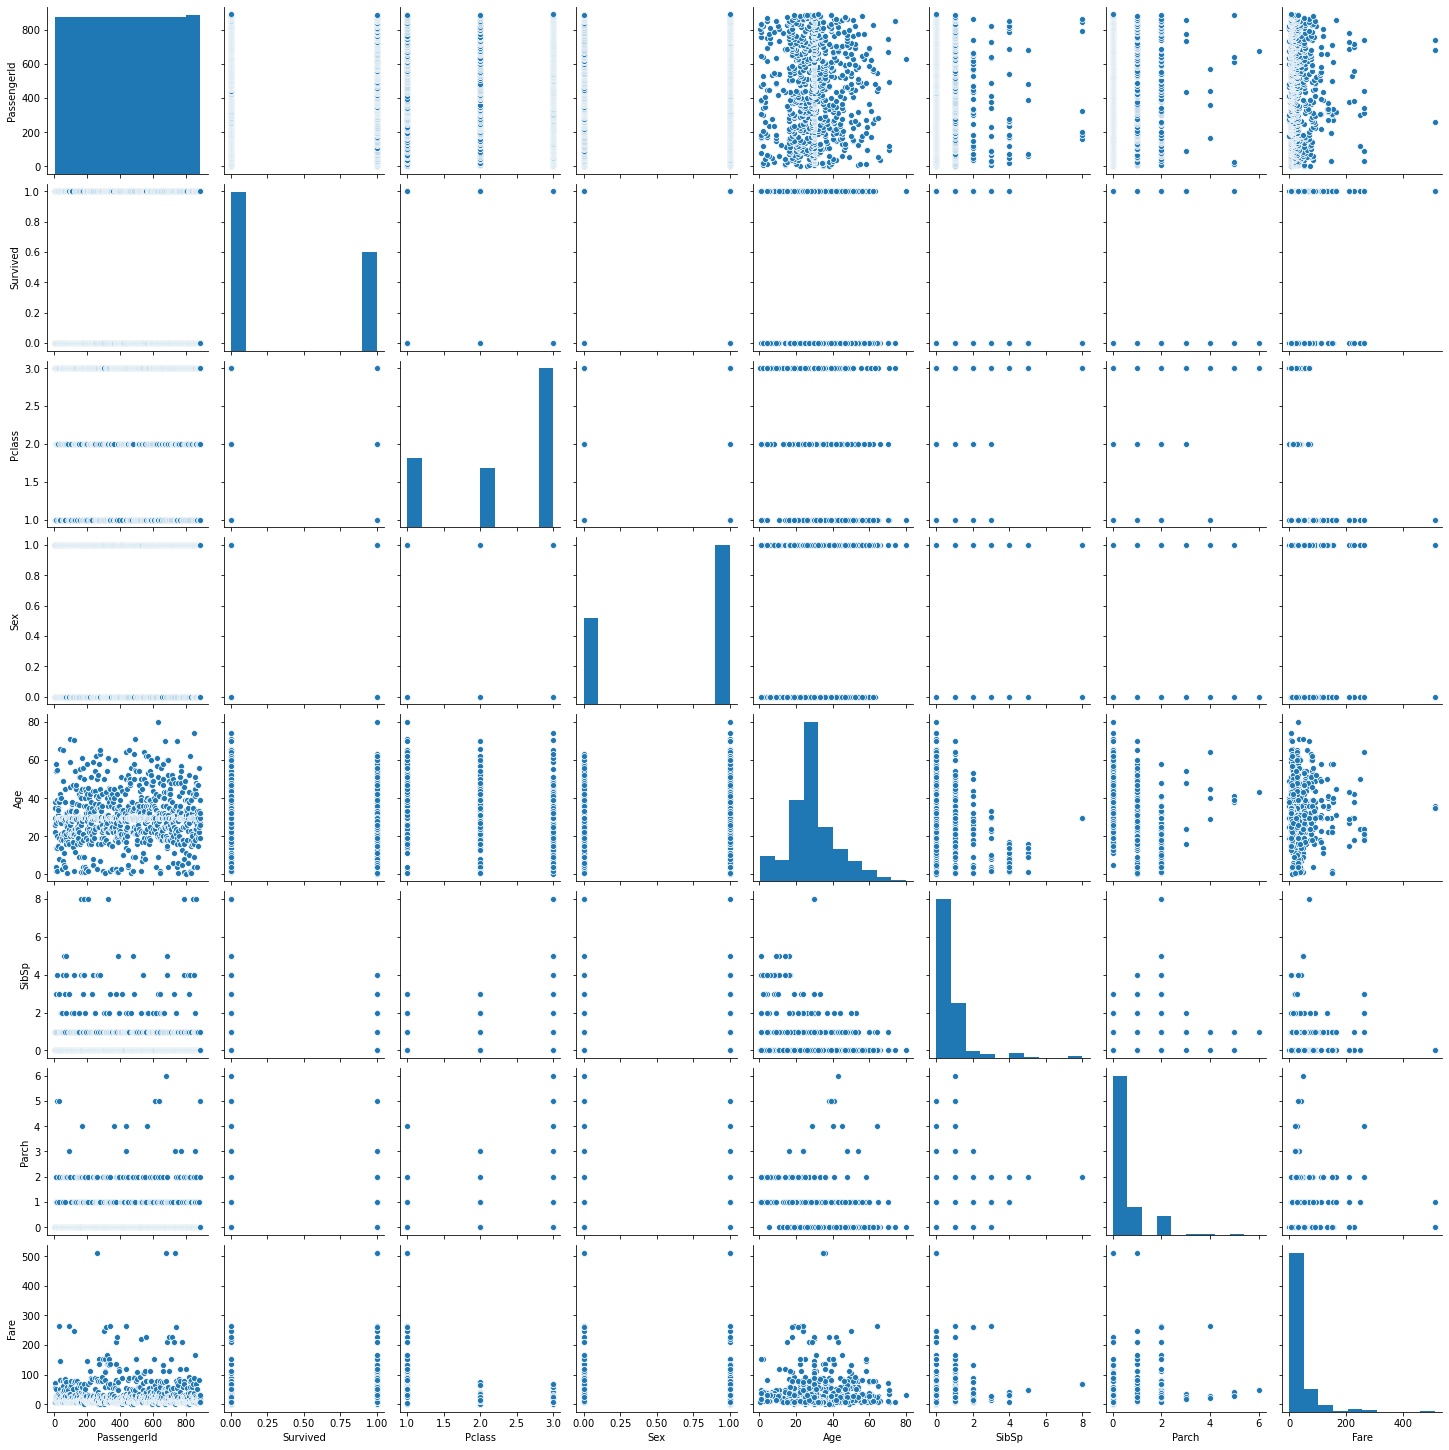

In [24]:
sns.pairplot(df)

# cleaning the data, removing the outliers.

In [25]:
threshold=3
z=abs(zscore(df))

In [26]:
df_new=df[(z<3).all(axis=1)]

In [27]:
df.shape

(891, 8)

In [28]:
df_new.shape

(820, 8)

In [29]:
df=df_new

In [30]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.000000,1,0,7.2500
1,2,1,1,0,38.000000,1,0,71.2833
2,3,1,3,0,26.000000,0,0,7.9250
3,4,1,1,0,35.000000,1,0,53.1000
4,5,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000
887,888,1,1,0,19.000000,0,0,30.0000
888,889,0,3,0,29.699118,1,2,23.4500
889,890,1,1,1,26.000000,0,0,30.0000


In [31]:
x=df.drop(['Survived'],axis=1)
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.000000,1,0,7.2500
1,2,1,0,38.000000,1,0,71.2833
2,3,3,0,26.000000,0,0,7.9250
3,4,1,0,35.000000,1,0,53.1000
4,5,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000
887,888,1,0,19.000000,0,0,30.0000
888,889,3,0,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


In [32]:
y=df.iloc[0:,1:-6]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [33]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[-1.74360547,  0.8339949 ,  0.72203588, ...,  1.05195589,
        -0.4511409 , -0.62370675],
       [-1.73968479, -1.58680446, -1.38497273, ...,  1.05195589,
        -0.4511409 ,  1.52510914],
       [-1.7357641 ,  0.8339949 , -1.38497273, ..., -0.56340709,
        -0.4511409 , -0.60105524],
       ...,
       [ 1.73796351,  0.8339949 , -1.38497273, ...,  1.05195589,
         3.0889121 , -0.08007059],
       [ 1.7418842 , -1.58680446,  0.72203588, ..., -0.56340709,
        -0.4511409 ,  0.13973292],
       [ 1.74580488,  0.8339949 ,  0.72203588, ..., -0.56340709,
        -0.4511409 , -0.60692786]])

In [34]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6
0,-1.743605,0.833995,0.722036,-0.641702,1.051956,-0.451141,-0.623707
1,-1.739685,-1.586804,-1.384973,0.675821,1.051956,-0.451141,1.525109
2,-1.735764,0.833995,-1.384973,-0.312321,-0.563407,-0.451141,-0.601055
3,-1.731843,-1.586804,-1.384973,0.428785,1.051956,-0.451141,0.914918
4,-1.727923,0.833995,0.722036,0.428785,-0.563407,-0.451141,-0.596861
...,...,...,...,...,...,...,...
815,1.730122,-0.376405,0.722036,-0.229976,-0.563407,-0.451141,-0.430749
816,1.734043,-1.586804,-1.384973,-0.888737,-0.563407,-0.451141,0.139733
817,1.737964,0.833995,-1.384973,-0.007717,1.051956,3.088912,-0.080071
818,1.741884,-1.586804,0.722036,-0.312321,-0.563407,-0.451141,0.139733


# performing the model

In [35]:
max_acc_score=0
for r_state in range(40,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predlg=lg.predict(x_test)
    acc_score=accuracy_score(y_test,predlg)
    print('the accuracy score corresponding to',r_state,'is:',acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print('the maximum accuracy at',final_r_state,'is:',max_acc_score)

the accuracy score corresponding to 40 is: 0.7560975609756098
the accuracy score corresponding to 41 is: 0.7865853658536586
the accuracy score corresponding to 42 is: 0.8292682926829268
the accuracy score corresponding to 43 is: 0.8414634146341463
the accuracy score corresponding to 44 is: 0.7926829268292683
the accuracy score corresponding to 45 is: 0.7987804878048781
the accuracy score corresponding to 46 is: 0.8292682926829268
the accuracy score corresponding to 47 is: 0.8292682926829268
the accuracy score corresponding to 48 is: 0.8109756097560976
the accuracy score corresponding to 49 is: 0.8353658536585366
the accuracy score corresponding to 50 is: 0.8292682926829268
the accuracy score corresponding to 51 is: 0.774390243902439
the accuracy score corresponding to 52 is: 0.7865853658536586
the accuracy score corresponding to 53 is: 0.7865853658536586
the accuracy score corresponding to 54 is: 0.7987804878048781
the accuracy score corresponding to 55 is: 0.7621951219512195
the accur

# model selection:

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=.20)
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print('the confusion matrix',confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8414634146341463
the confusion matrix [[88 14]
 [12 50]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       102
           1       0.78      0.81      0.79        62

    accuracy                           0.84       164
   macro avg       0.83      0.83      0.83       164
weighted avg       0.84      0.84      0.84       164



# cross validation:

In [37]:
cross_score=cross_val_score(lg,x,y,cv=5)
print('the mean is:',cross_score.mean())
print('the standard deviation is:',cross_score.std())

the mean is: 0.7865853658536587
the standard deviation is: 0.007712872341874104


# 2nd model:

In [47]:
max_acc_score=0
for r_state in range(40,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    svc=SVC(kernel='rbf')
    svc.fit(x_train,y_train)
    predsvc=svc.predict(x_test)
    acc_score=accuracy_score(y_test,predsvc)
    print('the accuracy score corresponding to',r_state,'is:',acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print('the maximum accuracy at',final_r_state,'is:',max_acc_score)

the accuracy score corresponding to 40 is: 0.7804878048780488
the accuracy score corresponding to 41 is: 0.8048780487804879
the accuracy score corresponding to 42 is: 0.8170731707317073
the accuracy score corresponding to 43 is: 0.8597560975609756
the accuracy score corresponding to 44 is: 0.8170731707317073
the accuracy score corresponding to 45 is: 0.8048780487804879
the accuracy score corresponding to 46 is: 0.8475609756097561
the accuracy score corresponding to 47 is: 0.8475609756097561
the accuracy score corresponding to 48 is: 0.823170731707317
the accuracy score corresponding to 49 is: 0.8353658536585366
the accuracy score corresponding to 50 is: 0.7987804878048781
the accuracy score corresponding to 51 is: 0.8048780487804879
the accuracy score corresponding to 52 is: 0.8353658536585366
the accuracy score corresponding to 53 is: 0.8109756097560976
the accuracy score corresponding to 54 is: 0.7987804878048781
the accuracy score corresponding to 55 is: 0.7987804878048781
the accur

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=79,test_size=.20)
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsvc=lg.predict(x_test)
print(accuracy_score(y_test,predsvc))
print('the confusion matrix',confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8475609756097561
the confusion matrix [[89  9]
 [16 50]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        98
           1       0.85      0.76      0.80        66

    accuracy                           0.85       164
   macro avg       0.85      0.83      0.84       164
weighted avg       0.85      0.85      0.85       164



cross validation:

In [41]:
cross_score=cross_val_score(svc,x,y,cv=5)
print('the mean is:',cross_score.mean())
print('the standard deviation is:',cross_score.std())

the mean is: 0.8219512195121951
the standard deviation is: 0.014116874271695364


# 3rd model:

In [51]:
max_acc_score=0
for r_state in range(40,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    acc_score=accuracy_score(y_test,preddtc)
    print('the accuracy score corresponding to',r_state,'is:',acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print('the maximum accuracy at',final_r_state,'is:',max_acc_score)

the accuracy score corresponding to 40 is: 0.6707317073170732
the accuracy score corresponding to 41 is: 0.7195121951219512
the accuracy score corresponding to 42 is: 0.7621951219512195
the accuracy score corresponding to 43 is: 0.774390243902439
the accuracy score corresponding to 44 is: 0.7560975609756098
the accuracy score corresponding to 45 is: 0.7134146341463414
the accuracy score corresponding to 46 is: 0.7926829268292683
the accuracy score corresponding to 47 is: 0.7804878048780488
the accuracy score corresponding to 48 is: 0.725609756097561
the accuracy score corresponding to 49 is: 0.725609756097561
the accuracy score corresponding to 50 is: 0.75
the accuracy score corresponding to 51 is: 0.7439024390243902
the accuracy score corresponding to 52 is: 0.7195121951219512
the accuracy score corresponding to 53 is: 0.725609756097561
the accuracy score corresponding to 54 is: 0.75
the accuracy score corresponding to 55 is: 0.7439024390243902
the accuracy score corresponding to 56 i

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=66,test_size=.20)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print('the confusion matrix',confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8292682926829268
the confusion matrix [[89 15]
 [13 47]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       104
           1       0.76      0.78      0.77        60

    accuracy                           0.83       164
   macro avg       0.82      0.82      0.82       164
weighted avg       0.83      0.83      0.83       164



# cross validation

In [54]:
cross_score=cross_val_score(dtc,x,y,cv=5)
print('the mean is:',cross_score.mean())
print('the standard deviation is:',cross_score.std())

the mean is: 0.7463414634146341
the standard deviation is: 0.11877572985913117


# 4rd model.

In [56]:
max_acc_score=0
for r_state in range(40,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    gnb=GaussianNB()
    gnb.fit(x_train,y_train)
    predgnb=gnb.predict(x_test)
    acc_score=accuracy_score(y_test,predgnb)
    print('the accuracy score corresponding to',r_state,'is:',acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print('the maximum accuracy at',final_r_state,'is:',max_acc_score)

the accuracy score corresponding to 40 is: 0.7012195121951219
the accuracy score corresponding to 41 is: 0.774390243902439
the accuracy score corresponding to 42 is: 0.7987804878048781
the accuracy score corresponding to 43 is: 0.8414634146341463
the accuracy score corresponding to 44 is: 0.7560975609756098
the accuracy score corresponding to 45 is: 0.7804878048780488
the accuracy score corresponding to 46 is: 0.7926829268292683
the accuracy score corresponding to 47 is: 0.823170731707317
the accuracy score corresponding to 48 is: 0.7439024390243902
the accuracy score corresponding to 49 is: 0.7439024390243902
the accuracy score corresponding to 50 is: 0.8109756097560976
the accuracy score corresponding to 51 is: 0.774390243902439
the accuracy score corresponding to 52 is: 0.7560975609756098
the accuracy score corresponding to 53 is: 0.7621951219512195
the accuracy score corresponding to 54 is: 0.8048780487804879
the accuracy score corresponding to 55 is: 0.725609756097561
the accuracy

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=.20)
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print('the confusion matrix',confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8414634146341463
the confusion matrix [[84 18]
 [ 8 54]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.87       102
           1       0.75      0.87      0.81        62

    accuracy                           0.84       164
   macro avg       0.83      0.85      0.84       164
weighted avg       0.85      0.84      0.84       164



In [58]:
cross_score=cross_val_score(gnb,x,y,cv=5)
print('the mean is:',cross_score.mean())
print('the standard deviation is:',cross_score.std())

the mean is: 0.7634146341463416
the standard deviation is: 0.044206265757053304


# 5th model:

In [61]:
max_acc_score=0
for r_state in range(40,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    predknn=knn.predict(x_test)
    acc_score=accuracy_score(y_test,predknn)
    print('the accuracy score corresponding to',r_state,'is:',acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print('the maximum accuracy at',final_r_state,'is:',max_acc_score)

the accuracy score corresponding to 40 is: 0.7317073170731707
the accuracy score corresponding to 41 is: 0.7865853658536586
the accuracy score corresponding to 42 is: 0.7865853658536586
the accuracy score corresponding to 43 is: 0.8353658536585366
the accuracy score corresponding to 44 is: 0.823170731707317
the accuracy score corresponding to 45 is: 0.75
the accuracy score corresponding to 46 is: 0.8353658536585366
the accuracy score corresponding to 47 is: 0.8475609756097561
the accuracy score corresponding to 48 is: 0.8414634146341463
the accuracy score corresponding to 49 is: 0.823170731707317
the accuracy score corresponding to 50 is: 0.774390243902439
the accuracy score corresponding to 51 is: 0.7987804878048781
the accuracy score corresponding to 52 is: 0.7804878048780488
the accuracy score corresponding to 53 is: 0.7987804878048781
the accuracy score corresponding to 54 is: 0.7865853658536586
the accuracy score corresponding to 55 is: 0.7682926829268293
the accuracy score corres

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.20)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print('the confusion matrix',confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8597560975609756
the confusion matrix [[90 10]
 [13 51]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       100
           1       0.84      0.80      0.82        64

    accuracy                           0.86       164
   macro avg       0.85      0.85      0.85       164
weighted avg       0.86      0.86      0.86       164



In [65]:
cross_score=cross_val_score(knn,x,y,cv=5)
print('the mean is:',cross_score.mean())
print('the standard deviation is:',cross_score.std())

the mean is: 0.8048780487804879
the standard deviation is: 0.01542574468374816


performing five model we have recived the maximum accuracy is Knn model that is 85.97% so we are seleting this model for our dataset.

In [66]:
import joblib

In [67]:
joblib.dump(knn,'knntitanicdataset.obj')

['knntitanicdataset.obj']